# Predicting Customer Churn to Increase Retention

***

## Table of Contents 

1. [Introduction](#1.-Introduction)
2. [Dataset](#2.-Dataset)
<br>2.1 [Data Overview](#2.1-Data-Overview)
<br>2.2 [Feature Overview](#2.2-Feature-Overview)
3. [Data Cleaning](#3.-Data-Cleaning)
4. [Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)
<br>4.1 [Summary Statistics of Numerical Features](#4.1-Summary-Statistics-of-Numerical-Features)
<br>4.2 [Visualizing Churn](#4.2-Visualizing-Churn)
<br>4.3 [Scatterplot of Churn & Contract by MonthlyCharges and tenure](#4.3-Scatterplot-of-Churn-&-Contract-by-MonthlyCharges-and-tenure)
<br>4.4 [Cluster 1 Analysis](#4.4-Cluster-1-Analysis)
<br>4.5 [Cluster 2 Analysis](#4.5-Cluster-2-Analysis)
<br>4.6 [Cluster 3 Analysis](#4.6-Cluster-3-Analysis)
<br>4.7 [Distribution of Numerical Features](#4.6-Distribution-of-Numerical-Features)
<br>4.8 [Churn Count per Categorical Feature](#4.7-Churn-Count-per-Categorical-Feature)
***

## 1. Introduction 

Acquiring a new customer can be five times more expensive than retaining an existing one! Such a staggering proportion emphasizes the importance of catering to an existing customer’s satisfaction and longevity to generate sales at a high ROI. In fact, increasing customer retention rates by as little as 5% can increase profits by 25 to 95%, according to a study done by Frederick Reichheld of Bain & Company. A key metric in evaluating customer retention is the customer churn rate.

In the telecommunications industry, the churn rate measures the percentage of service subscribers who discontinue their subscriptions over a particular period. Many providers in the industry offer similar services and generate the bulk of their revenue through subscription costs; therefore, the churn rate is a key metric to minimize to sustain subscription revenues.

The varying Internet, television, and telephone service providers available to the public make it easy and desirable for customers to try different services to see which works best for them. Some providers do not even require customers to lock into long-term contracts and give them the flexibility to change providers frequently. Service providers are able to provide more value to customers via short-term contracts by retaining their existing customers and minimizing their churn. 


## 2. Dataset

### 2.1 Data Overview

The dataset used in this project is available on Kaggle, [here.](https://www.kaggle.com/blastchar/telco-customer-churn)

Each row represents a customer and each column contains customers' attributes.
<br>The dataset includes information about:
* Demographic infomation about each customer – gender, age, and if they have partners and dependents.
* Services that each customer has signed up for – phone, multiple lines, Internet, online security, online backup, device protection, tech support, and streaming TV and movies.
* Customer account information – tenure, contract, payment method, paperless billing, monthly charges, and total charges.
* Customers who left within the last month - the column is called Churn and is our target variable.

### 2.2 Feature Overview

In [1]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

**A. Demographics**

| feature_name  | data_type   | description                    | unique_values      |
| ------------- | ----------- | ------------------------------ | ------------------ |
| gender        | categorical | sex                            | "Male" , "Female"  |
| SeniorCitizen | categorical | is senior citizen              | "Yes", "No"        |
| Partner       | categorical | customer has a partner         | "Yes", "No"        |
| Dependents    | categorical | customer has dependents        | "Yes", "No"        |

**B. Services**

| feature_name      | data_type   | description                    | unique_values              |
| ----------------- | ----------- | ------------------------------ | -------------------------- |
| PhoneService      | categorical | has phone service              | "Yes", "No"                |
| MultipleLines     | categorical | has multiple phone lines       | "Yes", "No"                |
| InternetService   | categorical | type of Internet service       | "DSL", "Fiber optic", "No" |
| OnlineSecurity    | categorical | has malware protection         | "Yes", "No"                |
| OnlineBackup      | categorical | has digital backup service     | "Yes", "No"                |
| DeviceProtection  | categorical | has device protection plan     | "Yes", "No"                |
| TechSupport       | categorical | has tech support               | "Yes", "No"                |
| StreamingTV       | categorical | has TV streaming service       | "Yes", "No"                |
| StreamingMovies   | categorical | has movie streaming service    | "Yes", "No"                |

**C. Account Information**

| feature_name      | data_type           | description                            | unique_values                   |
| ----------------- | ------------------- | -------------------------------------- | ------------------------------- |
| customerID        | categorical         | customer identification number         |                                 |
| tenure            | numerical (ordinal) | # of months with company               |                                 |
| Contract          | categorical         | contractual term                       | "Monthly", "Annual", "Biannual" |
| PaperlessBilling  | categorical         | billed via email                       | "Yes", "No"                     |
| PaymentMethod     | categorical         | method of payment on file              | "Electronic Check", "Mailed Check", "Bank transfer (automatic)", "Credit card (automatic)"    |
| MonthlyCharges    | numerical (cardinal)| amount charged to the customer monthly |                         |
| TotalCharges      | numerical (cardinal)| total amount charged to the customer   |                         |

**D. Target Variable**

| feature_name      | data_type         | description                    | unique_values                   |
| ----------------- | ----------------- | ------------------------------ | ------------------------------- |
| Churn             | categorical       | left within the last month     | "Yes", "No"                     |

***

## 3. Data Cleaning

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [3]:
#Load dataset
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv', index_col='customerID')

In [4]:
df.shape

(7043, 20)

In [5]:
# Identify feature data types and data set shape. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

The TotalCharges feature is encoded as an object data type with strings as values. Since the Series contains string values, it may contain null values that are encoded as strings, such as blank spaces or dashes. After checking for these null values, and imputing or dropping them, we must convert the Series to float64 data type.

In [7]:
# Identify number of missing (null) values in the data set.
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

At first glance, all features appear to have non-null entries; however, there may still be missing values encoded in different ways. Let's take a quick glance at the first 5 records to get a feel for the data.

In [8]:
# Display first 5 records 
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Replace 0 and 1 with "No" and "Yes" in SeniorCitizen feature, repectively, to keep values consistent. 
# (we will encode dummy variables later during preprocessing, not during data cleaning)

df.SeniorCitizen = df.SeniorCitizen.replace({1:'Yes', 0:'No'})

In [10]:
# Replace any whitespace values with NaN
df = df.replace(r'\s+$', np.nan, regex=True)

# Print number of null values 
print(df.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


The TotalCharges column contains 11 missing/null values. These records containing null values only comprise 0.16% of the total data and will be dropped.

In [11]:
# Drop missing values
df = df.dropna()

# After dropping the missing values from the TotalCharges column, convert it from string to float. 
df.TotalCharges = df.TotalCharges.astype(float)

In [12]:
# Display unique values for each feature.
for col in df:
    print(col)
    print(df[col].unique(), '\n')

gender
['Female' 'Male'] 

SeniorCitizen
['No' 'Yes'] 

Partner
['Yes' 'No'] 

Dependents
['No' 'Yes'] 

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService
['No' 'Yes'] 

MultipleLines
['No phone service' 'No' 'Yes'] 

InternetService
['DSL' 'Fiber optic' 'No'] 

OnlineSecurity
['No' 'Yes' 'No internet service'] 

OnlineBackup
['Yes' 'No' 'No internet service'] 

DeviceProtection
['No' 'Yes' 'No internet service'] 

TechSupport
['No' 'Yes' 'No internet service'] 

StreamingTV
['No' 'Yes' 'No internet service'] 

StreamingMovies
['No' 'Yes' 'No internet service'] 

Contract
['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling
['Yes' 'No'] 

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.

* For the features relating to Services, we replace the "No internet service" value to "No" to eliminate redundancy: the InternetService feature let's us know whether or not the customer had Internet services. 
* We must also replace the "No phone service" value in the MultipleLines feature with "No" to eliminate redunancy: the PhoneService feature let's us know whether or not the customer had phone services.
* For the Contract feature, let's replace the following for simplicity:
    * "Month-to-month" with "Monthly"
    * "One year" with "Annual"
    * "Two year" with "Biannual"

In [13]:
# Replace "No internet service" with "No"
internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for x in internet_cols:
    df[x] = df[x].replace({'No internet service' : 'No'})

# Replace "No phone service" with "No"
df.MultipleLines = df.MultipleLines.replace({'No phone service' : 'No'})

# Contract feature changes
df.Contract = df.Contract.replace({
    'Month-to-month' : 'Monthly',
    'One year' : "Annual",
    'Two year' : 'Biannual'
})

In [14]:
# View all changes made up to this point on the first 5 records
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Annual,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,Annual,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Electronic check,70.70,151.65,Yes


***

## 4. Exploratory Data Analysis

### 4.1 Summary Statistics of Numerical Features

In [15]:
# View summary statistics of numercial features
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### 4.2 Visualizing Churn

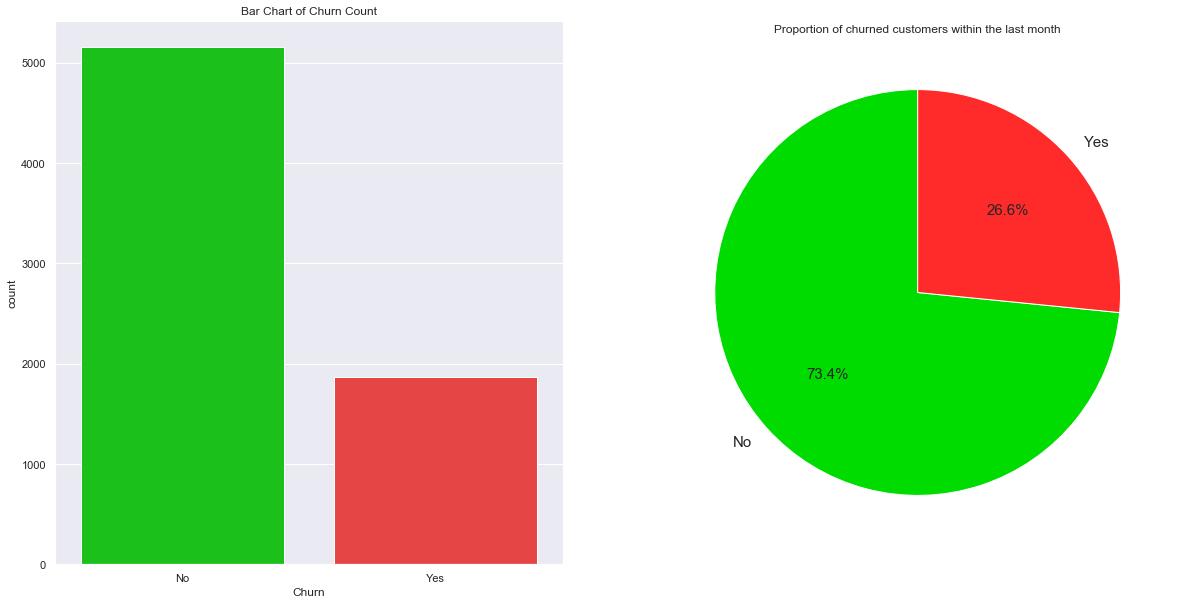

In [16]:
# Colors
lightgreen = '#00db00'
red = '#ff2b2b'

# Count (bar) plot
plt.figure(figsize=(20, 10));
plt.subplot(121);
sns.countplot(x='Churn', palette=[lightgreen, red], data=df);
plt.title('Bar Chart of Churn Count');

# Pie chart
plt.subplot(122);
labels = ['No', 'Yes']
colors = [lightgreen, red]
sizes = df.groupby('Churn').size()

# Draw pie chart
patches, texts, autotexts = plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90);

# Increase font size for labels
for text in texts:
    text.set_size(15)

# Increase font size for percentages
for autotext in autotexts:
    autotext.set_size(15)

plt.title('Proportion of churned customers within the last month');
plt.show()

The churn rate (target variable) in our dataset is imbalanced: about 30% of customers discontinued their subscriptions (churned) whereas 70% did not. The churn rate is expected to be imbalanced in the telecom industry and is therefore acceptable to analyze, visualize, and model on with our given samples.

### 4.3 Scatterplot of Churn & Contract by MonthlyCharges and tenure

As a quick recap, we only have 3 numeric features in the dataset: TotalCharges, MonthlyCharges, and tenure. 

A customer's total charges are **dependent** on monthly charges and tenure. As monthly charges increase, so will the total charges; similarly, as the customer's tenure with the company increases, so does the total charges incurred over the given period.

A customer's monthly charges, however, is **independent** of tenure since it doesn't effect the growth or change of the other. In the telecom industry, the churn rate is typically measured monthly since providers price their services on a monthly basis and experience faster churn rates. Monthly charges are therefore an essential feature to analyze when evaluating churn. Let's analyze clusters of churn between MonthlyCharges and tenure to uncover some hidden insights in our data.

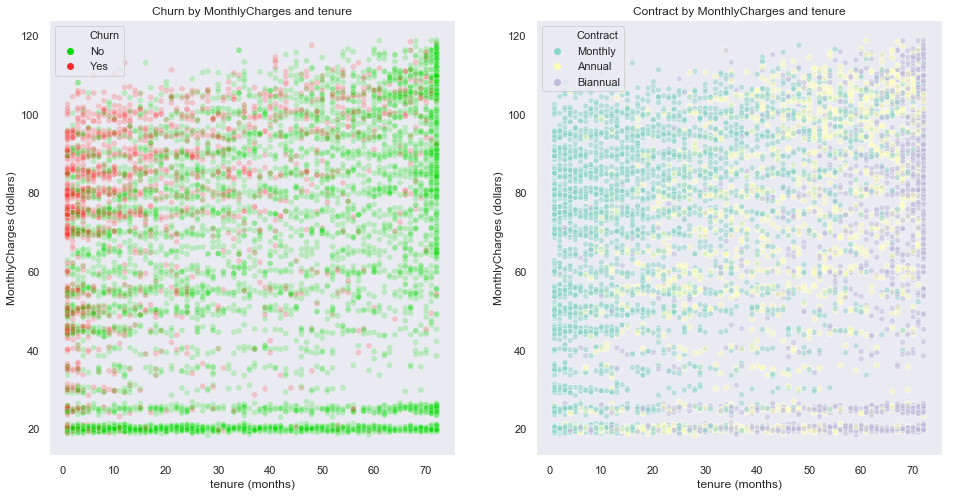

In [159]:
# Draw figure 
plt.figure(figsize=(16, 8));

# Scatterplot of Churn by MonthlyCharges and tenure 
plt.subplot(121);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', palette=[lightgreen, red], alpha=0.20, data=df);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Churn by MonthlyCharges and tenure');
plt.grid(False)

# Scatterplot of Contract by MonthlyCharges and tenure
plt.subplot(122);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Contract', palette='Set3', alpha=0.50, data=df);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Contract by MonthlyCharges and tenure');
plt.grid(False)

# Display plot
plt.show()

The scatterplot to the left visualizes **churn** by monthly charges and tenure with transparency to accentuate clusters of records. The scatterplot to the right visualizes **contract types** by monthly charges and tenure. Churn and Contract are represented on two different plots to clearly identify clusters and trends for each variable.

The scatterplots above convey the following information:
* **Cluster 1:** Customers that pay less than 35/mo tend to not churn for up to 70 months and sign longer contracts as their tenure increases.
* **Cluster 2:** Customers that pay more than 70/mo with less than 10 months of tenure have monthly contracts and tend to churn.
* **Cluster 3:** Customers with more than 60 months of tenure tend to not churn and sign biannual contracts that incur the highest monthly charges.

In the subseqeuent sections, we'll take an in-depth look at these clusters and interpret what they mean in terms of consumer behavior.

### 4.4 Cluster 1 Analysis
Customers that pay less than 35/mo tend to not churn for up to 70 months and sign longer contracts as their tenure increases.

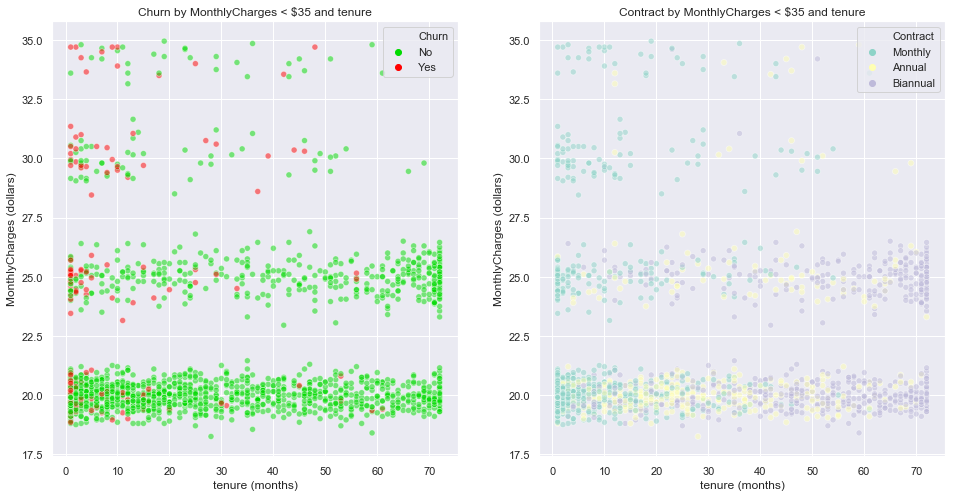

Churn frequency:
10.9% of customers paying less than $35/month churned.
89.1% of customers paying less than $35/month did NOT churn.


In [192]:
# ---------DIAGRAM 1--------- #
# Dataframe of MonthlyCharges less than $35
df_cluster1 = df[df.MonthlyCharges < 35]

# Draw figure to render subsequent plots
plt.figure(figsize=(16, 8));

# Scatterplot of records with MonthlyCharges less than $35
plt.subplot(121);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', palette=[lightgreen, 'red'], alpha=0.50, data=df_cluster1);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Churn by MonthlyCharges < $35 and tenure');

# ---------DIAGRAM 2--------- #
# Scatterplot of records with MonthlyCharges less than $35
plt.subplot(122);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Contract', hue_order=['Monthly', 'Annual', 'Biannual'], 
                palette='Set3', alpha=0.50, data=df_cluster1);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Contract by MonthlyCharges < $35 and tenure');
plt.show()

# Calculate churn rate for MonthlyCharges < $35
df_mo35 = df_cluster1.groupby('Churn').size()
no_mo35 = df_mo35[0]
yes_mo35 = df_mo35[1]
ret_mo35 = no_mo35 / (no_mo35 + yes_mo35)
churn_mo35 = yes_mo35 / (no_mo35 + yes_mo35)

print('Churn frequency:')
print('{0:.1%} of customers paying less than $35/month churned.'.format(churn_mo35))
print('{0:.1%} of customers paying less than $35/month did NOT churn.'.format(ret_mo35))

At **20/month**, the company retained customers for up to 70 months. Customers with lower tenure incurred these monthly charges more than those with higher tenure. This may suggest the company offered low rates to prospects and existing customers with low tenure to gain and maintain market share, repectively. Although there is consistent retention at this price, the amount of customers paying 20/month declined as their tenure increased. 

As tenure increases, a decreasing amount of customers pay 20/month while an increasing amount of customers pay **25/month**. This trend suggests retained customers increasingly spend more per month as their tenure increases - this trend can also be seen in [diagram 4.3](#4.3-Scatterplot-of-Churn-&-Contract-by-MonthlyCharges-and-tenure) above. Customer satisfaction increases with tenure, as does the willingness to incur higher monthly charges with additional subscriptions. The increasing amount of higher-spending, loyal customers can also be attributed to successful up-sell campaigns that influenced customer segments to purchase additional services.

At 20/mo and 25/mo, the number of signed annual and biannual contracts increases as tenure increases. This trend can be also be attributed to increased satisfaction or successful up-sell campaigns. 

## 4.5 Cluster 2 Analysis
Customers that pay more than 70/mo with less than 10 months of tenure have monthly contracts and tend to churn.

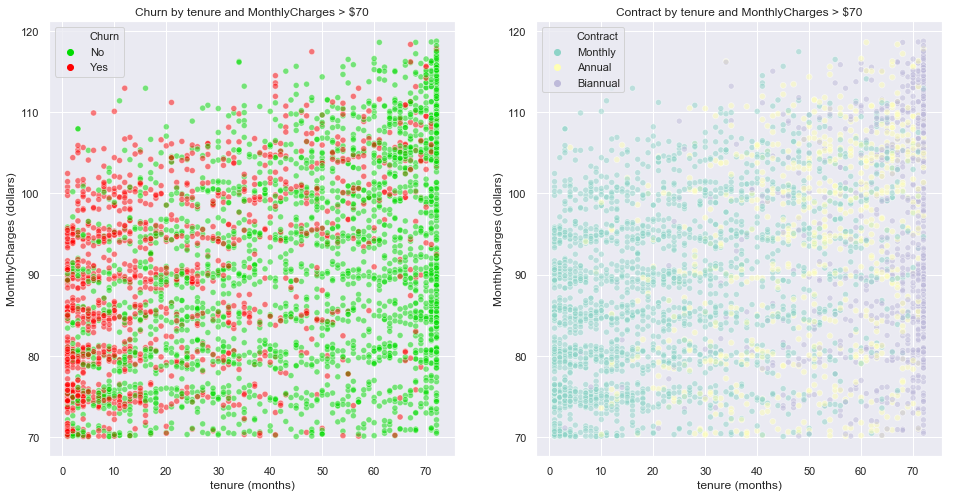

Churn rate:
69.7% of customers paying more than $70/month with less than 10 months of tenure churned.
30.3% of customers paying more than $70/month with less than 10 months of tenure did NOT churn.

Contract proportions:
99.8% of customers paying more than $70/month with less than 10 months THAT CHURNED had a monthly contract.
0.2%  of customers paying more than $70/month with less than 10 months of tenure THAT CHURNED had an annual contract.
0%    of customers paying more than $70/month with less than 10 months of tenure THAT CHURNED had a biannual contract.


In [272]:
# ---------DIAGRAM 1--------- #
# Dataframe of MonthlyCharges > $70
df_cluster2 = df[df.MonthlyCharges > 70]

# Draw figure to render subsequent plots
plt.figure(figsize=(16, 8));
plt.subplot(121);

# Scatterplot of Churn by tenure and MonthlyCharges greater than $70
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', hue_order=['No', 'Yes'], 
                palette=[lightgreen, 'red'], alpha=0.50, data=df_cluster2);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Churn by tenure and MonthlyCharges > $70');

# ---------DIAGRAM 2--------- #
# Scatterplot of Contract by tenure and MonthlyCharges greater than $70
plt.subplot(122);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Contract', palette='Set3', alpha=0.50, data=df_cluster2);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Contract by tenure and MonthlyCharges > $70');
plt.show()

# Calculate churn rate for MonthlyCharges > $70 and tenure < 10
df_c2 = df[(df.MonthlyCharges > 70) & (df.tenure < 10)].groupby('Churn').size()
no_mo70 = df_c2[0]
yes_mo70 = df_c2[1]
ret_mo70 = no_mo70 / (no_mo70 + yes_mo70)
churn_mo70 = yes_mo70 / (no_mo70 + yes_mo70)

print('Churn rate:')
print('{0:.1%} of customers paying more than $70/month with less than 10 months of tenure churned.'.format(churn_mo70))
print('{0:.1%} of customers paying more than $70/month with less than 10 months of tenure did NOT churn.'.format(ret_mo70))

# Calculate Contract proportions for MonthlyCharges > $70 and tenure < 10
df_con2 = df[(df.MonthlyCharges > 70) & (df.tenure < 10)].groupby(['Contract', 'Churn']).size()

# Retained
monthly_no = df_con2[3]
annual_no = df_con2[0]
biannual_no = df_con2[2]

# Churned
monthly_yes = df_con2[4]
annual_yes = df_con2[1]

# Calculate churn rates
monthYesRate = monthly_yes / (monthly_yes + annual_yes)
annualYesRate = annual_yes / (monthly_yes + annual_yes)

print('\nContract proportions:')
print('{0:.1%} of customers paying more than $70/month with less than 10 months THAT CHURNED had a monthly contract.'.format(monthYesRate))
print('{0:.1%}  of customers paying more than $70/month with less than 10 months of tenure THAT CHURNED had an annual contract.'.format(annualYesRate))
print('0%    of customers paying more than $70/month with less than 10 months of tenure THAT CHURNED had a biannual contract.')

The scatterplot to the left visualizes the **churn frequency** for customers paying 70 to 118 per month; the scatterplot to the right visualizes **contract types**  for the same customer segment.

70% of customers who paid more than 70/mo with less than 10 months of tenure discontinued their services (churned). This customer segment churned more than any other segment in the company. Almost all of the customers who churned in this segment had monthly contracts. The high monthly payments and flexibility to terminate services sooner incentivized this segment to churn and find better deals with different providers.

## 4.6 Cluster 3 Analysis
Customers with more than 60 months of tenure tend to not churn and sign biannual contracts that incur the highest monthly charges.

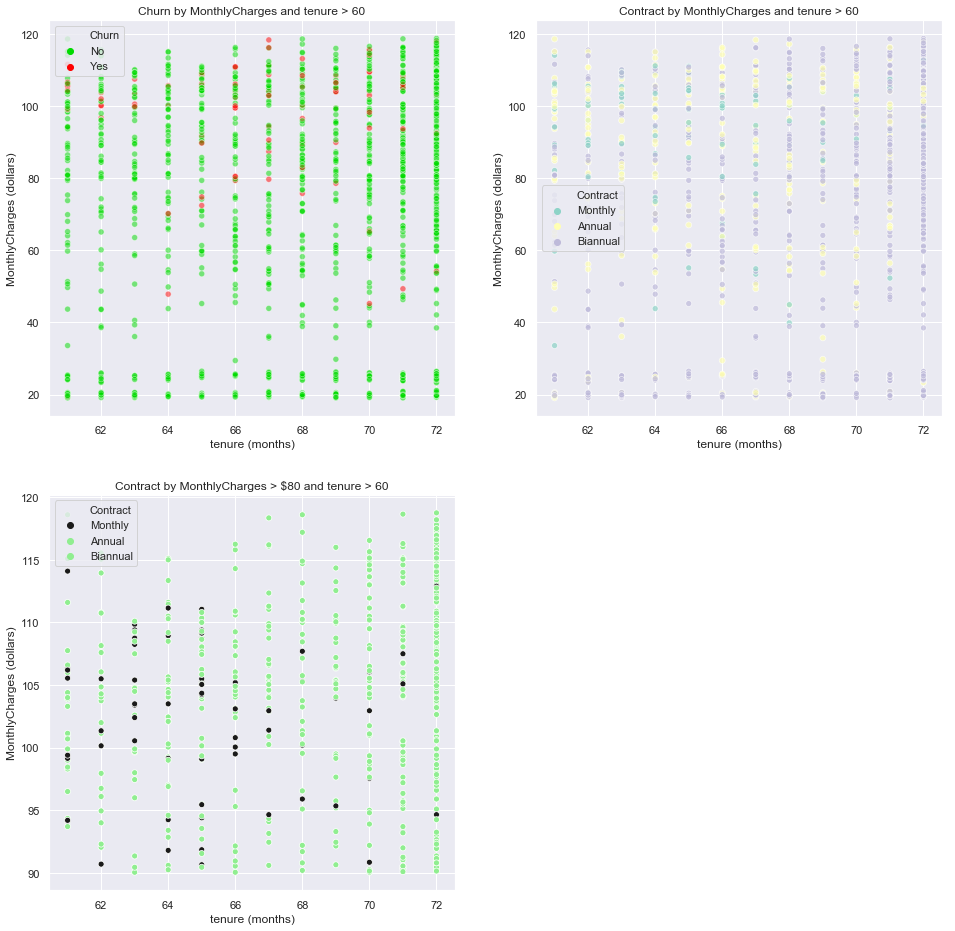

Churn rate:
93.4% of customer with more than 60 months of tenure did NOT churn.
6.6%  of customer with more than 60 months of tenure churned.

Contract proportions:
7.7%  of customers with more than 60 months of tenure had monthly contracts.
22.2% of customers with more than 60 months of tenure had annual contracts.
70.1% of customers with more than 60 months of tenure had biannual contracts.


In [317]:
# ---------DIAGRAM 1--------- #
# Dataframe of tenure > 60
df_cluster3 = df[df.tenure > 60]

# Draw figure to render subsequent plots
plt.figure(figsize=(16, 16));
plt.subplot(221);

# Scatterplot Churn by MonthlyCharges and tenure greater than 60
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', hue_order=['No', 'Yes'], 
                palette=[lightgreen, 'red'], alpha=0.50, data=df_cluster3);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Churn by MonthlyCharges and tenure > 60');

# ---------DIAGRAM 2--------- #
# Scatterplot of Contract by MonthlyCharges and tenure > 60
plt.subplot(222);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Contract', hue_order=['Monthly', 'Annual', 'Biannual'],
                palette='Set3', alpha=0.70, data=df_cluster3);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Contract by MonthlyCharges and tenure > 60');

# ---------DIAGRAM 3--------- #
# Scatterplot of Contract by MonthlyCharges > $80 and tenure > 60
plt.subplot(223);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Contract', hue_order=['Monthly', 'Annual', 'Biannual'],
                palette=['k', 'lightgreen', 'lightgreen'], alpha=1, data=df[(df.tenure > 60) & (df.MonthlyCharges > 90)]);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Contract by MonthlyCharges > $80 and tenure > 60');

plt.show()

# Calculate churn rate for tenure > 60
df_c3 = df_cluster3.groupby('Churn').size()
ret_c3 = df_c3[0]
churn_c3 = df_c3[1]

retRatec3 = ret_c3 / (ret_c3 + churn_c3)
churnRatec3 = churn_c3 / (ret_c3 + churn_c3)

print('Churn rate:')
print('{0:.1%} of customer with more than 60 months of tenure did NOT churn.'.format(retRatec3))
print('{0:.1%}  of customer with more than 60 months of tenure churned.'.format(churnRatec3))

# Calculate contract proportions for tenure > 60
df_con3 = df_cluster3.groupby('Contract').size()

monthly3 = df_con3[2]
annual3 = df_con3[0]
biannual3 = df_con3[1]

monthlyRate3 = monthly3 / (monthly3 + annual3 + biannual3)
annualRate3 = annual3 / (monthly3 + annual3 + biannual3)
biannualRate3 = biannual3 / (monthly3 + annual3 + biannual3)

print('\nContract proportions:')
print('{0:.1%}  of customers with more than 60 months of tenure had monthly contracts.'.format(monthlyRate3))
print('{0:.1%} of customers with more than 60 months of tenure had annual contracts.'.format(annualRate3))
print('{0:.1%} of customers with more than 60 months of tenure had biannual contracts.'.format(biannualRate3))

The scatterplot in the top-left visualizes the **churn frequency** for customers with over 60 months of tenure; the scatterplot in the top-right visualizes **contract types** for the same customer segment. The scatterplot in the lower-left emphasizes the minimal amount of monthly contracts in the top 15% percentile of MonthlyCharges.

93% of customers with more than 60 months of tenure continued using the company's services. This segment accounts for the top 15% of customer tenure and **churned the least** out of any other segment in the company. These are the most loyal customers given their high tenure and retention rate. As the segment's tenure increases, the churn rate significantly decreases at all monthly charges - customers become less sensitive to price changes in the top 15% of tenure. 

70% of the segment had biannual contracts, 22% had annual contracts, and only 8% had monthly contracts. 

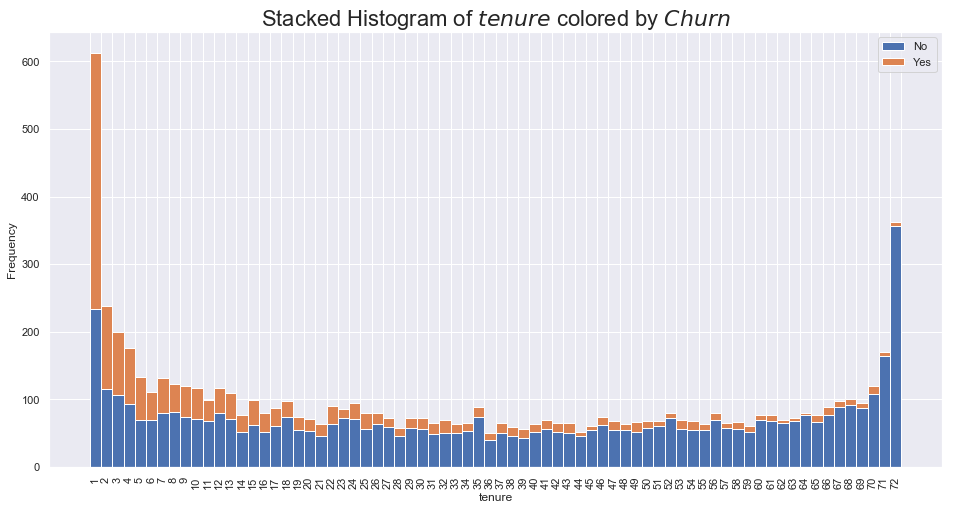

In [325]:
# Prepare data
x_var = 'tenure'
groupby_var = 'Churn'

df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16, 8))
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 
                            df[x_var].unique().__len__(), 
                            stacked=True, 
                            density=False)
# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.xticks(ticks=bins, labels=np.unique(df[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

### 4.6 Distribution of Numerical Features

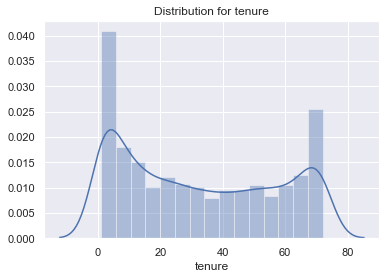

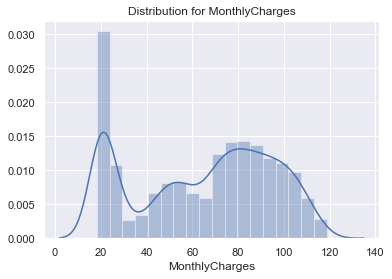

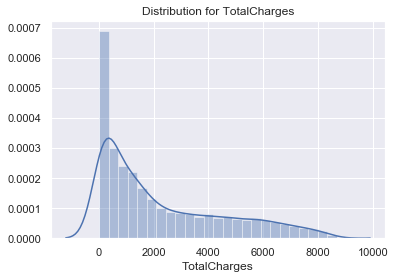

In [29]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

def numerical_col(col):
    sns.distplot(df[col]);
    plt.title('Distribution for ' + col);
    plt.show()
    
for col in num_cols:
    numerical_col(col)

The distributions of the numerical features appear to **not** be normal. We will need to normalize and standardize them to make further statistical inferences on them.

### 4.7 Churn Count per Categorical Feature

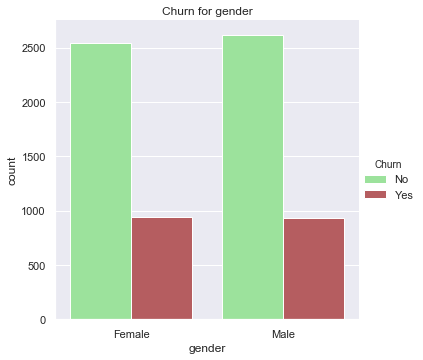

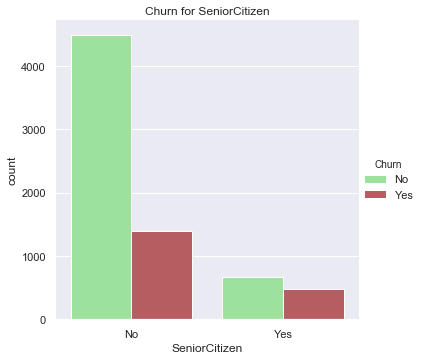

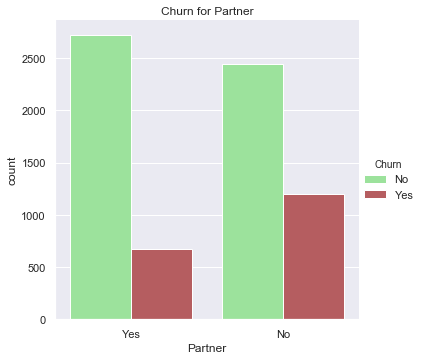

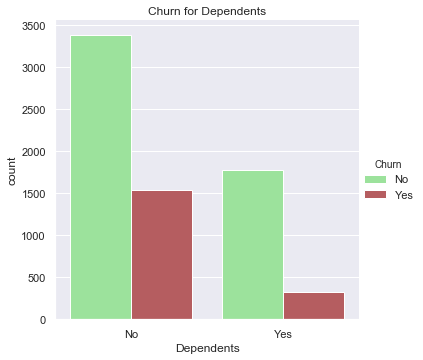

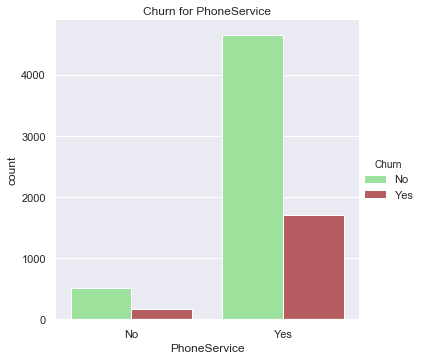

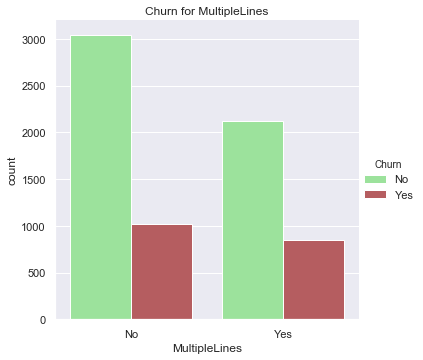

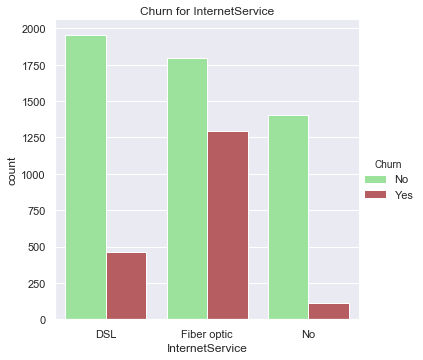

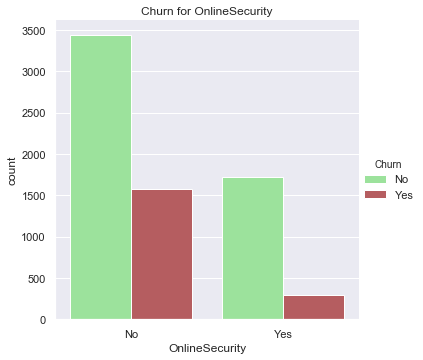

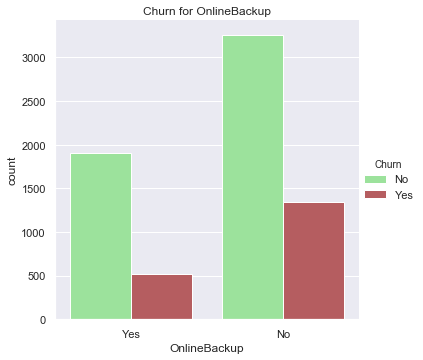

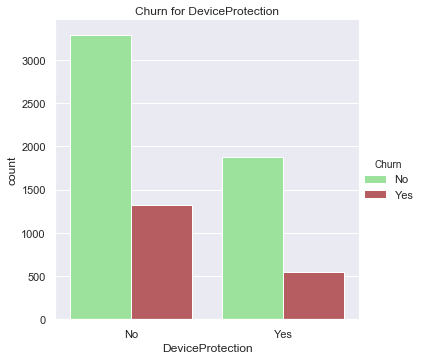

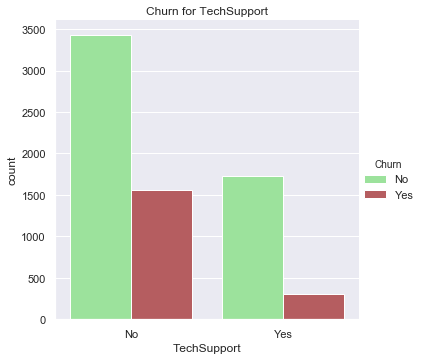

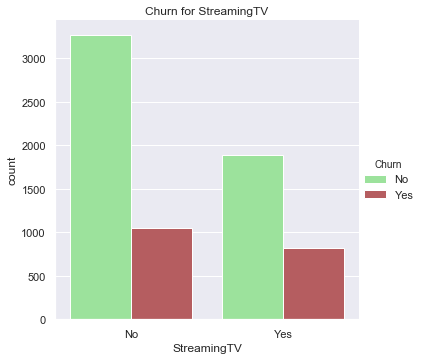

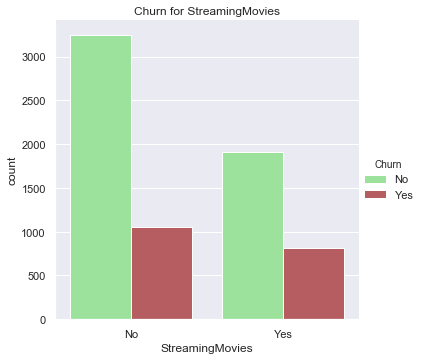

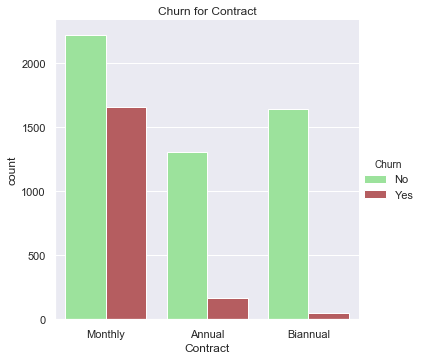

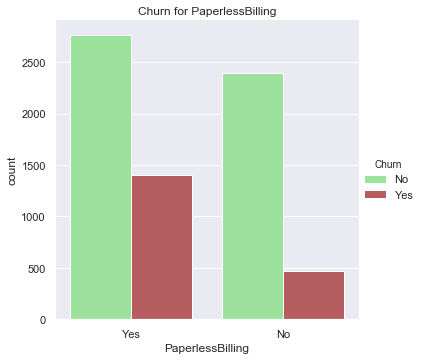

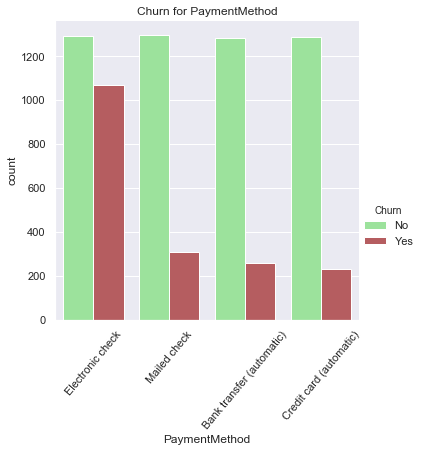

In [21]:
# Categorical columns (omit Churn - see 3.2 above for Churn count visualization)
cat_cols = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

def categorical_churn(col):
    sns.catplot(x=col, hue='Churn', kind='count', palette=['lightgreen','r'], data=df);
    plt.title("Churn for " + col)
    if col == 'PaymentMethod':
        plt.xticks(rotation=50);
    
for col in cat_cols:
    categorical_churn(col)

***

Let's plot the 3 non-binary categorical features against the numerical features.
* InternetService: DSL, Fiber optic, No
* Contract: Monthly, Annual, Biannual
* PaymentMethod: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)

### InternetService by tenure and Churn

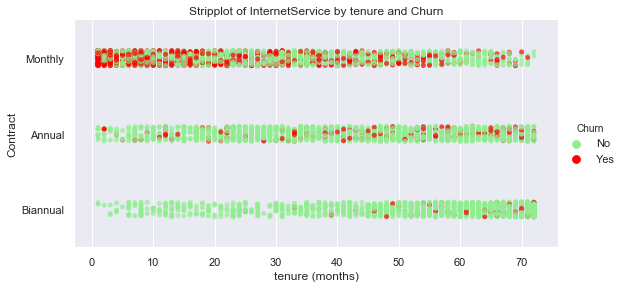

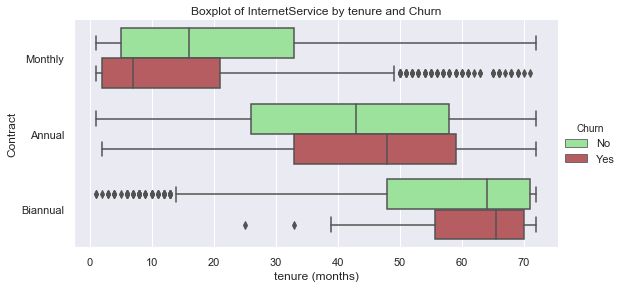

In [120]:
sns.catplot(x='tenure', y='Contract', hue='Churn', kind='strip', palette=['lightgreen', 'red'], alpha=0.7, height=4, aspect=2, data=df);
plt.title('Stripplot of InternetService by tenure and Churn');
plt.xlabel('tenure (months)');

# Boxplot of InternetService by tenure and Churn
sns.catplot(x='tenure', y='Contract', hue='Churn', kind='box', palette=['lightgreen', 'r'], height=4, aspect=2, data=df);
plt.title('Boxplot of InternetService by tenure and Churn');
plt.xlabel('tenure (months)');

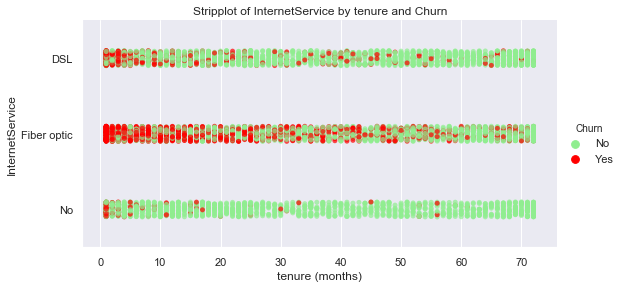

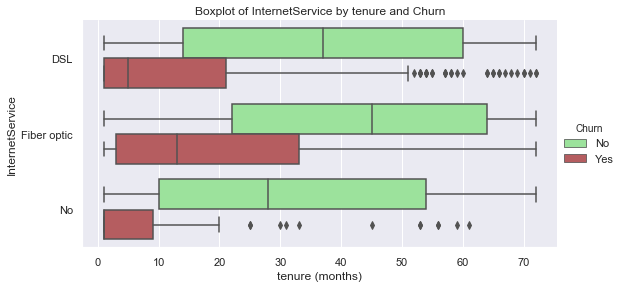

In [22]:
# Stripplot of InternetService by tenure and Churn
sns.catplot(x='tenure', y='InternetService', hue='Churn', kind='strip', palette=['lightgreen', 'red'], alpha=0.7, height=4, aspect=2, data=df);
plt.title('Stripplot of InternetService by tenure and Churn');
plt.xlabel('tenure (months)');

# Boxplot of InternetService by tenure and Churn
sns.catplot(x='tenure', y='InternetService', hue='Churn', kind='box', palette=['lightgreen', 'r'], height=4, aspect=2, data=df);
plt.title('Boxplot of InternetService by tenure and Churn');
plt.xlabel('tenure (months)');

Customers with high total charges and less than 40 months of tenure terminated their services with the company.

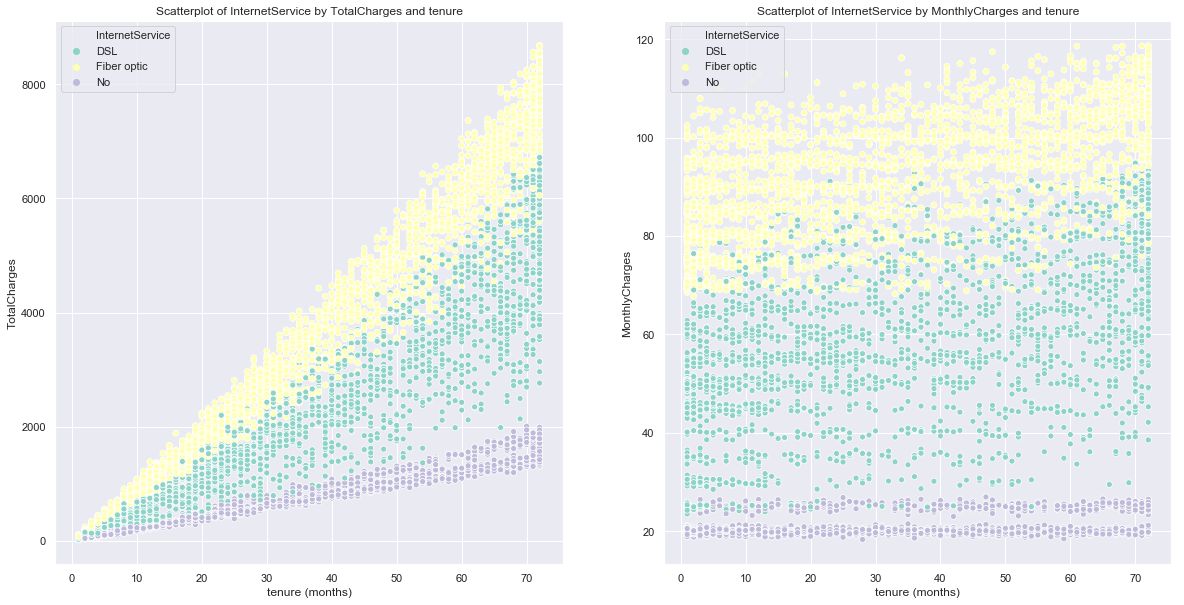

In [23]:
# Scatterplot of InternetService by TotalCharges and tenure
plt.figure(figsize=(20, 10));
plt.subplot(121);
sns.scatterplot(x='tenure', y='TotalCharges', hue='InternetService', palette='Set3', data=df);
plt.xlabel('tenure (months)');
plt.title('Scatterplot of InternetService by TotalCharges and tenure');

# Scatterplot of InternetService by MonthlyCharges and tenure
plt.subplot(122);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='InternetService', palette='Set3', data=df);
plt.xlabel('tenure (months)');
plt.title('Scatterplot of InternetService by MonthlyCharges and tenure');

plt.show()

## Scatterplot of numeric features
### No categorical features depicted in this plot

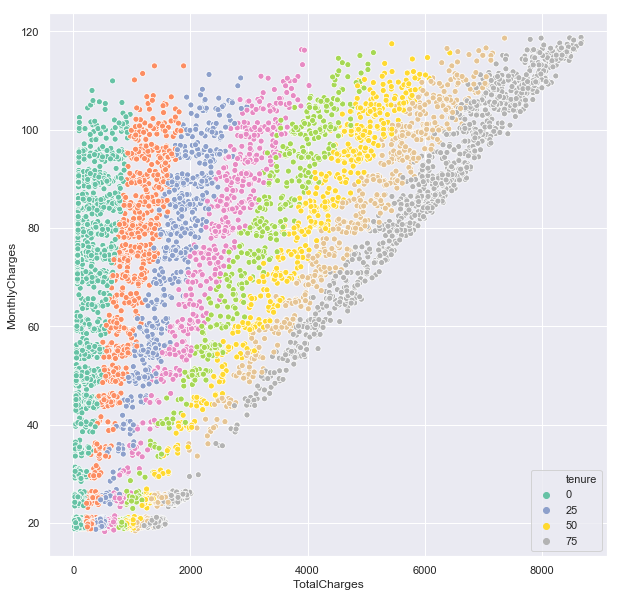

In [24]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', hue='tenure', palette='Set2', data=df);

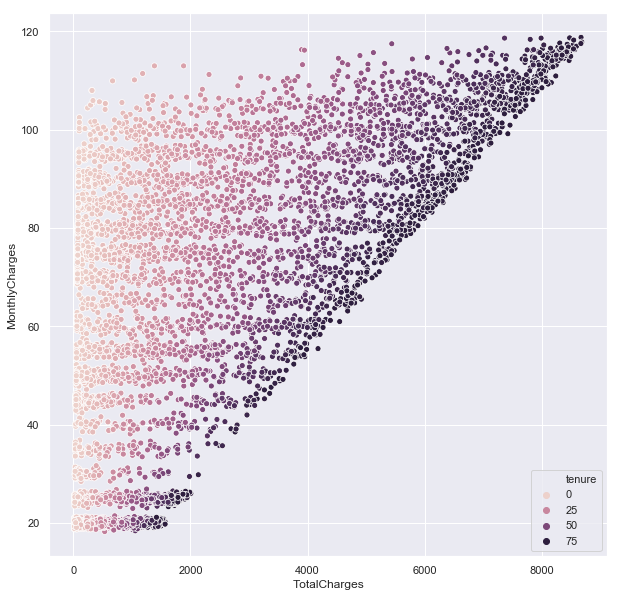

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', hue='tenure', data=df);

In [26]:
# Features organized by customer information

# Demographic features
demo_cols = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents'
]

# Services features
services_cols = [
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Account information features
account_cols = [
    'customerID',
    'tenure',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'MonthlyCharges',
    'TotalCharges'
]

# Target variable
target = 'Churn'

In [27]:
# Numerical columns
num_cols = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]

In [28]:
# plt.figure(figsize=(12,12), dpi=80)
# sns.heatmap(df_cat_encoded.corr(), xticklabels=df_cat_encoded.corr().columns, yticklabels=df_cat_encoded.corr().columns, center=0, annot=True);

# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()